In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os


In [3]:
os.listdir()


['.config', 'Prediction Insurance.csv', 'sample_data']

In [4]:
file_path = "./Prediction Insurance.csv"


In [5]:
df = pd.read_csv(file_path)
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [6]:
df.shape

(381109, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


As we can see from above, all the data has no null values

In [8]:
for i in df.columns:
    print(i)
    print("-"*50  )
    print(df.value_counts(i))
    print("\n")
    print(f"{i}'s unique values: {df[i].nunique()}")
    print("-"*50  )

id
--------------------------------------------------
id
1         1
254071    1
254080    1
254079    1
254078    1
         ..
127035    1
127034    1
127033    1
127032    1
381109    1
Name: count, Length: 381109, dtype: int64


id's unique values: 381109
--------------------------------------------------
Gender
--------------------------------------------------
Gender
Male      206089
Female    175020
Name: count, dtype: int64


Gender's unique values: 2
--------------------------------------------------
Age
--------------------------------------------------
Age
24    25960
23    24256
22    20964
25    20636
21    16457
      ...  
81       56
82       29
83       22
84       11
85       11
Name: count, Length: 66, dtype: int64


Age's unique values: 66
--------------------------------------------------
Driving_License
--------------------------------------------------
Driving_License
1    380297
0       812
Name: count, dtype: int64


Driving_License's unique values: 2
---------

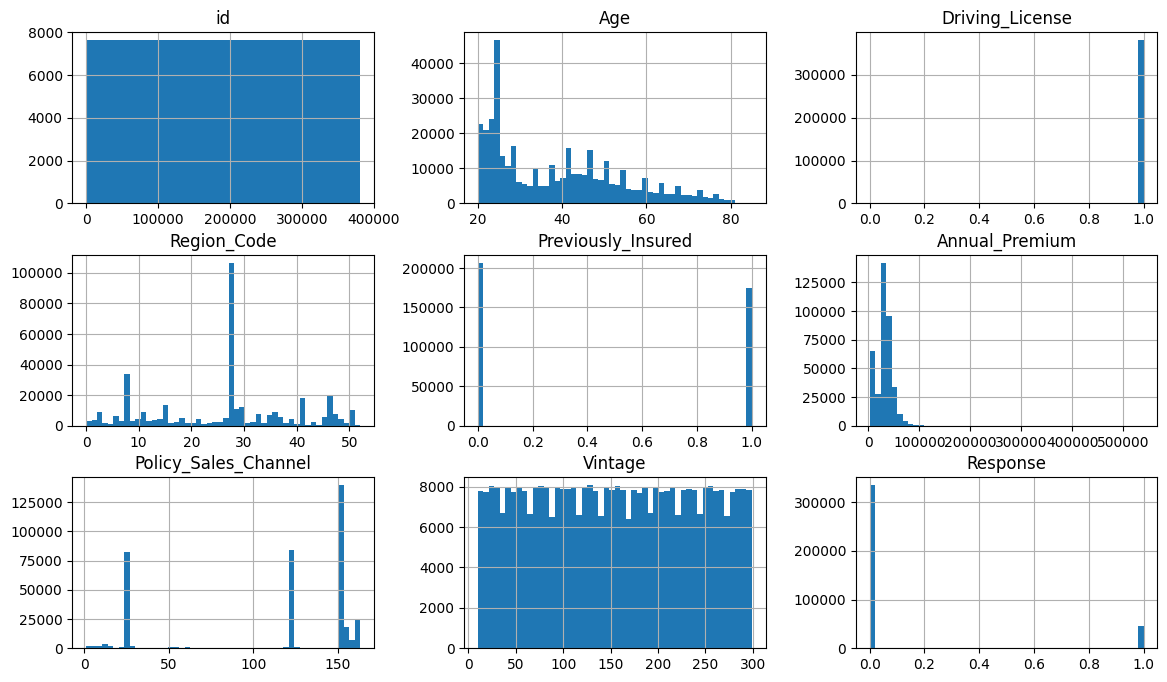

In [9]:
df.hist(bins=50, figsize=(14, 8))
plt.show()

In [10]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [11]:
for i in df.columns:
    print(f"{i}'s unique values: {df[i].nunique()}")

id's unique values: 381109
Gender's unique values: 2
Age's unique values: 66
Driving_License's unique values: 2
Region_Code's unique values: 53
Previously_Insured's unique values: 2
Vehicle_Age's unique values: 3
Vehicle_Damage's unique values: 2
Annual_Premium's unique values: 48838
Policy_Sales_Channel's unique values: 155
Vintage's unique values: 290
Response's unique values: 2


In [12]:
df['Gender']= df['Gender'].map({'Male':1, 'Female':0})
df['Vehicle_Damage']= df['Vehicle_Damage'].map({'Yes':1, 'No':0})
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28,0,> 2 Years,1,40454,26,217,1
1,2,1,76,1,3,0,1-2 Year,0,33536,26,183,0
2,3,1,47,1,28,0,> 2 Years,1,38294,26,27,1
3,4,1,21,1,11,1,< 1 Year,0,28619,152,203,0
4,5,0,29,1,41,1,< 1 Year,0,27496,152,39,0


In [13]:
df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [14]:
df['Vehicle_Age']= df['Vehicle_Age'].map({'1-2 Year':1, '< 1 Year':0, '> 2 Years':2})
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28,0,2,1,40454,26,217,1
1,2,1,76,1,3,0,1,0,33536,26,183,0
2,3,1,47,1,28,0,2,1,38294,26,27,1
3,4,1,21,1,11,1,0,0,28619,152,203,0
4,5,0,29,1,41,1,0,0,27496,152,39,0


In [15]:
import seaborn as sns

<Axes: >

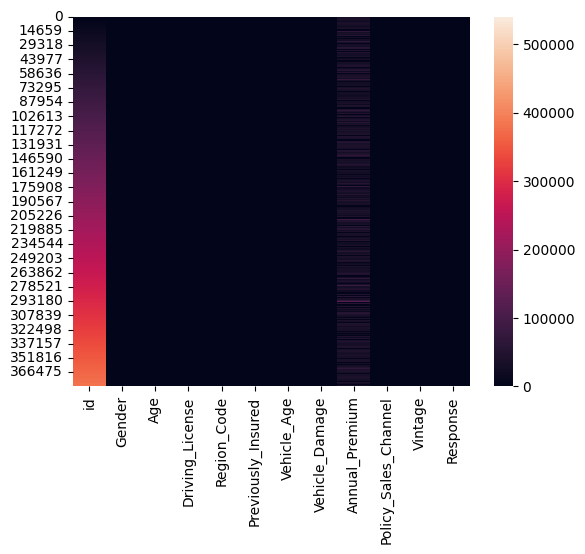

In [16]:
sns.heatmap(df)

<Axes: >

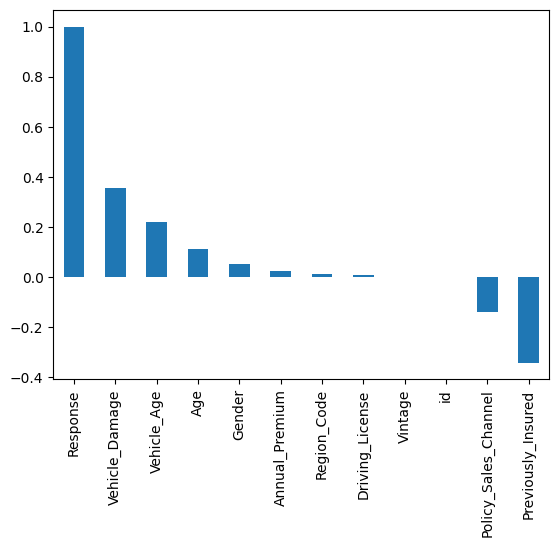

In [17]:
df.corr()['Response'].sort_values(ascending=False).plot(kind='bar')

In [18]:
from sklearn.model_selection import train_test_split #proses belajar
from sklearn.metrics import classification_report #hasil belajar

In [19]:
X = df.drop('Response', axis=1)
y = df['Response']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler


In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
from sklearn.metrics import accuracy_score  # Example metric (replace with yours)
from sklearn.metrics import classification_report #hasil belajar
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [43]:
models = []

In [44]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
models.append(pd.DataFrame({'Model': 'Logistic Regression', 'F1-Score': f1, 'Accuracy': accuracy}, index=[0]))

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
models.append(pd.DataFrame({'Model': 'Decision Tree', 'F1-Score': f1, 'Accuracy': accuracy}, index=[0]))

# Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
models.append(pd.DataFrame({'Model': 'Random Forest', 'F1-Score': f1, 'Accuracy': accuracy}, index=[0]))

In [46]:
# Combine results into a single DataFrame
df_results = pd.concat(models, ignore_index=True)

# Print model comparison table with row numbers and formatted output
df_results.index.name = 'No'
model_results_string = df_results.to_string(
    index=True,
    justify='left',
)
print(model_results_string)

   Model                 F1-Score  Accuracy
No                                         
0   Logistic Regression  0.003212  0.876620
1         Decision Tree  0.301805  0.823450
2         Random Forest  0.124864  0.871825


In [53]:
X_test[1]

array([-1.27913685,  0.92132398,  1.0398901 ,  0.04607838, -0.86452395,
       -0.91973411,  0.68462152,  0.98944643,  0.4006904 , -1.58246139,
       -0.6250992 ])

From the data above, i will choose the random forest because it has the highest accuracy score

In [48]:
# Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [50]:
import pickle
#model export
with open('modelRFpkl','wb') as file:
    pickle.dump(model, file)

In [51]:
y_predict = model.predict(X_test)
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93    122856
           1       0.08      0.40      0.13      2910

    accuracy                           0.87    125766
   macro avg       0.53      0.64      0.53    125766
weighted avg       0.96      0.87      0.91    125766



In [55]:
model_rf = pickle.load(open('modelRFpkl', 'rb'))
new_data = [-1.27913685,  0.92132398,  1.0398901 ,  0.04607838, -0.86452395, -0.91973411,  0.68462152,  0.98944643,  0.4006904 , -1.58246139,-0.6250992 ]
new_data = np.array(new_data).reshape(1, -1)
prediction = model_rf.predict(new_data)
print(prediction)

[0]
